In [109]:
import sys
sys.path.append('..')
from osp import *

df_meta = get_corpus_metadata(periodize_by=20).query('year>=1920 and year<2020')
df_meta_lit = df_meta.query('discipline == "Literature"')
df_meta_phil = df_meta.query('discipline == "Philosophy"')

In [126]:

words = get_non_content_words()[:100]
# words = get_top_mdw_words(n=780, wordset="top")
# words = get_top_words(780)
# words = ['hence','the','and','therefore']
data = get_counts_wordset(words)

finding word freqs: 100%|██████████| 100/100 [00:00<00:00, 1205259.77it/s]


In [127]:
def get_data_norm(data, field='journal'):
    data['_target'] = [df_meta.loc[i][field] if i in df_meta.index else "?" for i in data.index]
    grp_cnts = data['_target'].value_counts()
    bad_grps = grp_cnts[grp_cnts<100].index.tolist()
    bad_grps.append("?")
    data = data.query('_target not in @bad_grps')
    data_smpl = data.groupby('_target').mean(numeric_only=True)
    data_smpl_norm = data_smpl.div(data_smpl.sum(axis=1),axis=0)
    return data_smpl_norm

In [128]:
data_smpl_norm = get_data_norm(data, 'decade_discipline')

In [129]:
from scipy.spatial.distance import pdist, squareform

# Compute the pairwise distance matrix (Euclidean by default)
dist_matrix = squareform(pdist(data_smpl_norm, metric='euclidean'))

# dist_matrix is a (n_samples, n_samples) numpy array of distances

In [130]:
# dist_matrix

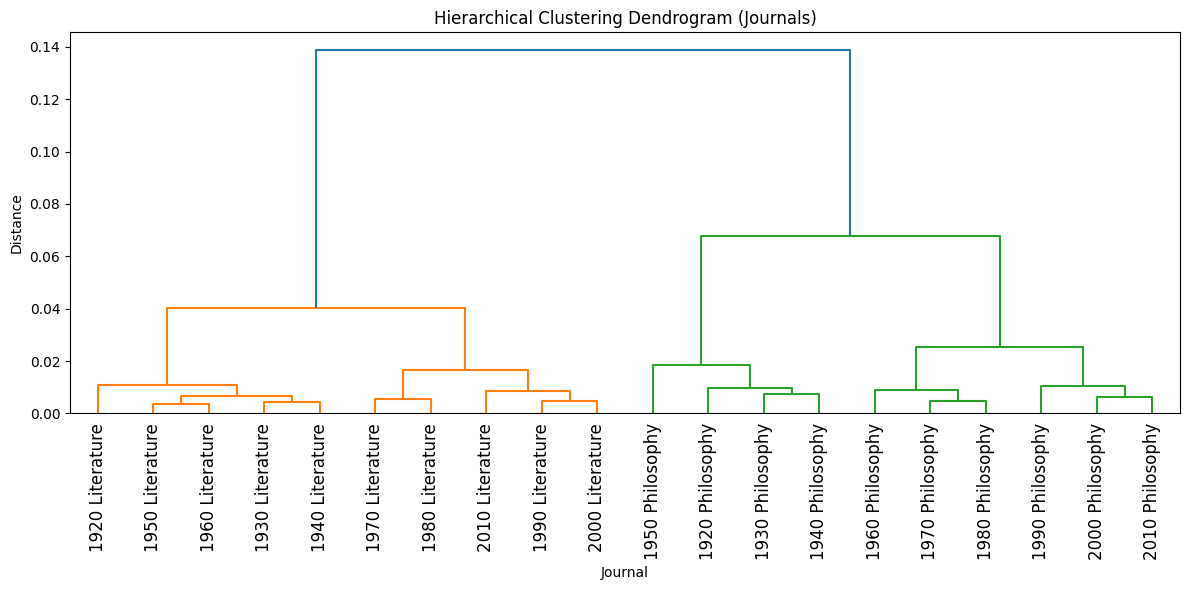

In [131]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Perform hierarchical clustering using the linkage method (e.g., 'ward' or 'average')
linkage_matrix = sch.linkage(squareform(dist_matrix, checks=False), method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix, labels=data_smpl_norm.index, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram (Journals)')
plt.xlabel('Journal')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()
